## Sentiment Prediction
After lebaling all the text data, I am going to build a classifier to do the prediction based on TextBlob and my model

In [1]:
# import related libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from keras.utils.np_utils import to_categorical
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# google colab file system
from google.colab import files
import io
uploaded = files.upload()

Saving reddit_final_my_sentiment.csv to reddit_final_my_sentiment.csv


In [3]:
# Load data
comments = pd.read_csv('reddit_final_my_sentiment.csv')

* CountVectorizer just counts the word frequencies.(bag of words) 

* With the TFIDFVectorizer the value increases proportionally to count, but is offset by the frequency of the word in the corpus. - This is the IDF (inverse document frequency part).

In [4]:
# Convert a collection of text documents to a matrix of token counts
c_vectorizer = CountVectorizer() 
t_vectorizer = TfidfVectorizer()
cv = c_vectorizer.fit_transform(comments.text)
tv = t_vectorizer.fit_transform(comments.text)

In [5]:
# split the training and text set/Set a random state to make sure the result is the same everytime I run the code
#This is textblob
c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(cv, comments['sentiment'],test_size = 0.25, random_state = 5)
t_x_train, t_x_test, t_y_train, t_y_test = train_test_split(tv, comments['sentiment'],test_size = 0.25, random_state = 5)
#This is my Kaggle model
kc_x_train, kc_x_test, kc_y_train, kc_y_test = train_test_split(cv, comments['my_sentiment'],test_size = 0.25, random_state = 5)
kt_x_train, kt_x_test, kt_y_train, kt_y_test = train_test_split(tv, comments['my_sentiment'],test_size = 0.25, random_state = 5)

**Naive Bayes classifiers** 

are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence 

* The Multinomial Naive Bayes simply lets us know that each p(fi|c) is a multinomial distribution, rather than some other distribution. 
* ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. 

In [7]:
#fit(features_matrix, item_we_want_to_predict)
mnb = MultinomialNB()
cnb = ComplementNB()


In [13]:
#defining the model
#compilimg the model -> we are going to use already used models MNB and CNB
#fitting the model
print("Textblob pretrained model\n")
print("bag of word score")
mnb.fit(c_x_train, c_y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(c_x_test), c_y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(c_x_train, c_y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(c_x_test), c_y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

print("tfidf score")

mnb.fit(t_x_train, t_y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(t_x_test), t_y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(t_x_train, t_y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(t_x_test), t_y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')
print("----------------------------------------------------------")
print("My kaggle model\n")
print("bag of word score")
mnb.fit(kc_x_train, kc_y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(kc_x_test), kc_y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(kc_x_train, kc_y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(kc_x_test), kc_y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

print("tfidf score")

mnb.fit(kt_x_train, kt_y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(kt_x_test), kt_y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(kt_x_train, kt_y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(kt_x_test), kt_y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')


Textblob pretrained model

bag of word score
accuracy_score_mnb = 64.68%
accuracy_score_cnb = 68.33%
tfidf score
accuracy_score_mnb = 54.66%
accuracy_score_cnb = 65.52%
----------------------------------------------------------
My kaggle model

bag of word score
accuracy_score_mnb = 63.95%
accuracy_score_cnb = 61.62%
tfidf score
accuracy_score_mnb = 63.93%
accuracy_score_cnb = 63.36%


As we can see the kaggle model is very stable in bag of word and tfidf vectorizer. It even got better accuracy rate in Multinomial Naive Bayes with tfidf vectorization 

In [17]:
# print the classification report
print("Textblob pretrained model report\n")
mnb_bow_report = classification_report(c_y_test,mnb.predict(c_x_test),target_names = ['negative','neutral','positive'])
print('bag of word')
print(mnb_bow_report)
mnb_tfidf_report = classification_report(t_y_test,mnb.predict(t_x_test),target_names = ['negative','neutral','positive'])
print('tfidf')
print(mnb_tfidf_report)
print("----------------------------------------------------")
print("My kaggle model\n")
mnb_bow_report = classification_report(kc_y_test,mnb.predict(kc_x_test),target_names = ['negative','neutral','positive'])
print('bag of word')
print(mnb_bow_report)
mnb_tfidf_report = classification_report(kt_y_test,mnb.predict(kt_x_test),target_names = ['negative','neutral','positive'])
print('tfidf')
print(mnb_tfidf_report)

Textblob pretrained model report

bag of word
              precision    recall  f1-score   support

    negative       0.31      0.70      0.43      2013
     neutral       0.35      0.59      0.44      1912
    positive       0.72      0.07      0.12      4238

    accuracy                           0.35      8163
   macro avg       0.46      0.45      0.33      8163
weighted avg       0.53      0.35      0.27      8163

tfidf
              precision    recall  f1-score   support

    negative       0.34      0.60      0.43      2013
     neutral       0.31      0.69      0.43      1912
    positive       0.74      0.05      0.09      4238

    accuracy                           0.33      8163
   macro avg       0.46      0.45      0.32      8163
weighted avg       0.54      0.33      0.25      8163

----------------------------------------------------
My kaggle model

bag of word
              precision    recall  f1-score   support

    negative       0.59      0.88      0.71      

Confusion Matrix

Textblob pretrained model



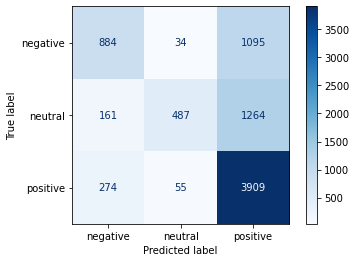

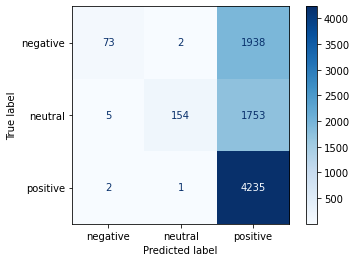

In [20]:
print("Textblob pretrained model\n")
plot_confusion_matrix(mnb.fit(c_x_train, c_y_train), c_x_test, c_y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')
plot_confusion_matrix(mnb.fit(t_x_train, t_y_train), t_x_test, t_y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

My kaggle model



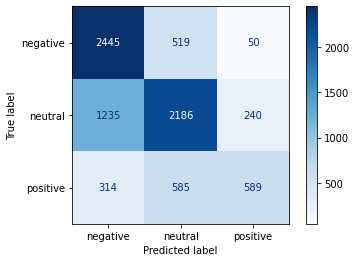

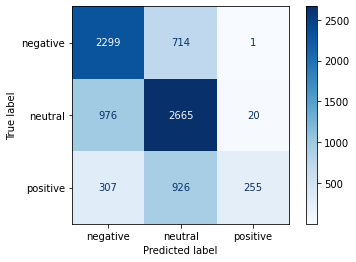

In [21]:
print("My kaggle model\n")
plot_confusion_matrix(mnb.fit(kc_x_train, kc_y_train), kc_x_test, kc_y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')
plot_confusion_matrix(mnb.fit(kt_x_train, kt_y_train), kt_x_test, kt_y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

I think the in-balance data in different sentiments affect the performance of the model